### Use sentiment analysis to extract customer sentiments for product functionality

This analysis is based of 34,000 consumer reviews for Amazon products like Kindle, Fire TV etc. The full dataset is provided by Datainfiniti's Product Database upon creating an account with them. The dataset includes basic product information, ratings review text and more for each product. Sample public dataset is available here - https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products. For the capstone I will analyze the bigger dataset consisting of reviews for more than millions of customer reviews accessed through API.

Project Proposal:
Customers are generally shopping for products looking for some specific functionalities. For example, a tablet with really good camera. It can be useful to extract the positive sentiment associated with product specs and negative sentiment associated with product specs and highlight it for new customers. It can also be useful for product manufacturer to understand what customers think of their products.

### Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

#Show 30 columns
pd.set_option('max_columns', 30)
pd.get_option("display.max_columns")

30

In [15]:
# Read Data
temp = pd.read_csv('1429_1.csv')
temp.head()

C:\Users\mxg4153\.conda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


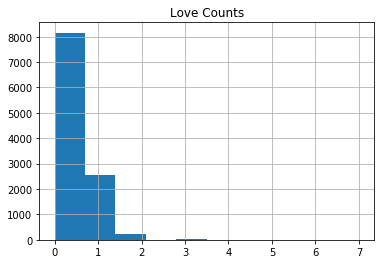

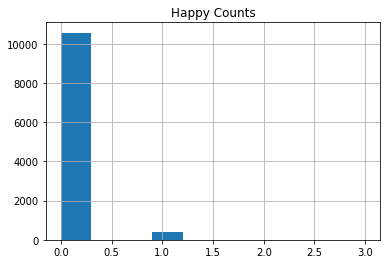

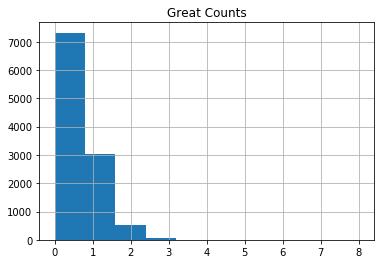

In [85]:
# Fire tab data filters to Amazon Fire Tab records
fire_tab = temp[temp.asins=='B018Y229OU'].copy(deep = True)
reviews_len = fire_tab['reviews.text'].str.len()
love_count = fire_tab['reviews.text'].str.lower().str.count('love')
love_count.hist()
plt.title('Love Counts')
plt.show()
happy_count = fire_tab['reviews.text'].str.lower().str.count('happy')
happy_count.hist()
plt.title('Happy Counts')
plt.show()
great_count = fire_tab['reviews.text'].str.lower().str.count('great')
great_count.hist()
plt.title('Great Counts')
plt.show()

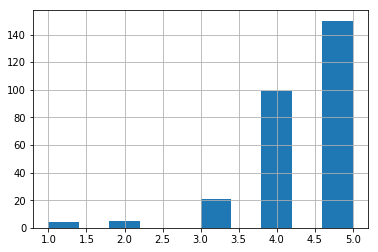

In [55]:
# Most reviews for fire tab say that the camera is good
fire_tab[fire_tab['reviews.text'].str.lower().str.contains('camera')]['reviews.rating'].hist()

In [66]:
print(reviews_len.sort_values().head(10))
print(reviews_len.sort_values().tail(10))

6724      6
10333    48
14478    48
13337    49
10742    49
8282     49
11298    49
7770     49
11267    50
4313     50
Name: reviews.text, dtype: int64
11959    1844
4353     1976
6019     2008
13633    2011
9395     2043
11631    2105
5680     2216
6027     2671
9547     2678
12021    3097
Name: reviews.text, dtype: int64


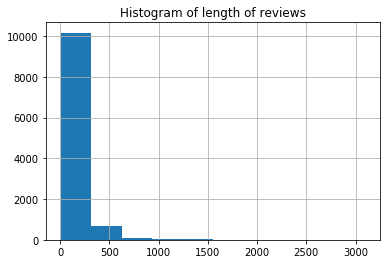

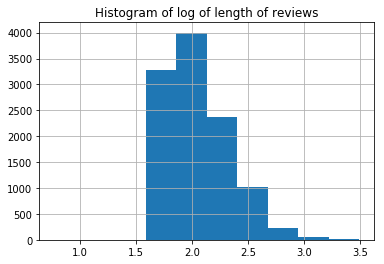

In [64]:
reviews_len.hist()
plt.title('Histogram of length of reviews')
plt.show()
np.log10(reviews_len).hist()
plt.title('Histogram of log of length of reviews')
plt.show()

In [56]:
permanent = fire_tab[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

reviews.rating      0
reviews.text        0
reviews.title       0
reviews.username    1
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
3695,4.0,"Good basic tablet for checking email , web bro...",Good,Jacques
3696,5.0,I love this tablet. It was a great buy. I woul...,Great tablet!,resolution516
3697,5.0,"Brought my old tablet in to my local store, an...",Good tablet for a low price.,AvatarRei
3698,4.0,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner,blondia
3699,4.0,I got this for my niece. I would say this prod...,Great for kids,EliteOne


### Positive and negative Texts

In [8]:
senti = permanent[permanent['reviews.rating'].notnull()]
senti.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [10]:
senti['senti'] = senti['reviews.rating']>=3
senti['senti'] = senti['senti'].replace([True,False],['pos','neg'])
senti.head()

C:\Users\mxg4153\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mxg4153\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reviews.rating,reviews.text,reviews.title,reviews.username,senti
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,pos
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,pos
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,pos
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,pos
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,pos


### Count of Reviews

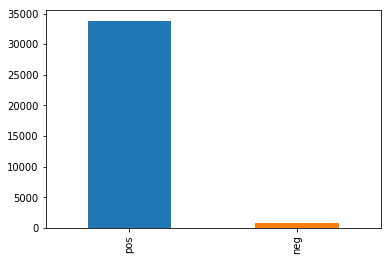

In [13]:
senti['senti'].value_counts().plot.bar()

In [80]:
temp.groupby('asins')['reviews.rating'].agg(['mean','count','std']).sort_values(by = ['mean','count'])

,mean,count,std
asins,,,
B006GWO5WK,2.461538,13,1.853617
B00QL1ZN3G,3.066667,15,1.709915
B00UH4D8G2,3.125000,8,2.031010
B002Y27P6Y,3.500000,10,1.840894
B005PB2T2Q,3.666667,6,1.211060
B00LW9XOJM,3.923077,13,1.441153
B005PB2T0S,4.000000,5,0.707107
B00QFQRELG,4.205479,73,1.384025
B00X4WHP5E,4.285714,7,1.112697


In [84]:
temp[temp.asins == 'B006GWO5WK'].loc[:,'reviews.text']

34647    Excellent charging quality with heavy duty cor...
34648    This charger (9W) rapid charger is as describe...
34649    just what i expected and just what I wanted. t...
34650    Although the description states that this will...
34651                                     Connects snugly!
34652    So I was already not too pleased with Amazon's...
34653    As a charger, it works but is nothing special....
34654    This is exactly like any other usb power charg...
34655    This is not appreciably faster than any other ...
34656    Amazon should include this charger with the Ki...
34657    Love my Kindle Fire but I am really disappoint...
34658    I was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: reviews.text, dtype: object

Above product is a charger and customers are using phrases like - not fast enough, did not contain, nothing special, bad amazon's choice etc. These can be extracted from data with pareto chart to analyze the top complaints.